In [ ]:
# importing data from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# unzipping data
!unzip drive/MyDrive/ColabNotebooks/Datasets/photos.zip

Archive:  drive/MyDrive/ColabNotebooks/Datasets/photos.zip
   creating: photos/
  inflating: __MACOSX/._photos       
  inflating: photos/P8210881.JPG     
  inflating: __MACOSX/photos/._P8210881.JPG  
  inflating: photos/P8210659.JPG     
  inflating: __MACOSX/photos/._P8210659.JPG  
  inflating: photos/P8210895.JPG     
  inflating: __MACOSX/photos/._P8210895.JPG  
  inflating: photos/IMG_3284.JPG     
  inflating: __MACOSX/photos/._IMG_3284.JPG  
  inflating: photos/P8210665.JPG     
  inflating: __MACOSX/photos/._P8210665.JPG  
  inflating: photos/P2231196.JPG     
  inflating: __MACOSX/photos/._P2231196.JPG  
  inflating: photos/Fasadai biopazaida (31).JPG  
  inflating: __MACOSX/photos/._Fasadai biopazaida (31).JPG  
  inflating: photos/P8210671.JPG     
  inflating: __MACOSX/photos/._P8210671.JPG  
  inflating: photos/IMG_3290.JPG     
  inflating: __MACOSX/photos/._IMG_3290.JPG  
  inflating: photos/P8210842.JPG     
  inflating: __MACOSX/photos/._P8210842.JPG  
  inflating: ph

In [ ]:
#### installing libraries
!pip install datasets
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 14.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 7.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-no

In [ ]:
!pip install -q git+https://github.com/huggingface/peft.git transformers bitsandbytes datasets

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 14.2 MB/s eta 0:00:00


# Fine-Tune BLIP on Buildings Defects

Using Hugging Face transformers, peft and bitsandbytes

For this project  we're using a dataset obtained from Kaggle linked below. A subset of the images have been manually selected and labeled.

kaggle link

### Setup environment

In [ ]:
# !pip install -q git+https://github.com/huggingface/peft.git transformers bitsandbytes datasets

### Load the dataset

Load selected images from dataset

In [ ]:
# from PIL import Image
# import os

# def load_images_from_list(image_names, directory):
#     images = []
#     for image_name in image_names:
#         # Construct the path to the image
#         image_path = os.path.join(directory, image_name)
#         # Check if the file exists
#         if os.path.exists(image_path):
#             # Open the image
#             image = Image.open(image_path)
#             # Append the image to the list
#             images.append(image)
#         else:
#             print(f"Image '{image_name}' not found in directory '{directory}'")
#     return images

# # Example usage:
# directory = 'photos/'
# image_names = ['Dazu pazeidimai (6).JPG', 'IMG_3654.JPG', 'P7131533.JPG', 'IMG_3321.JPG', 'P7131018.JPG', 'P7130702.JPG', 'Fasadai biopazaida (5).JPG', 'Dazu pazeidimai (10).JPG', 'IMG_3420.JPG', 'Sirses (24).JPG', 'IMG_3804.JPG', 'IMG_3284.JPG', 'P2231196.JPG', 'Sirses (13).JPG', 'IMG_3864.JPG', 'P7130767.JPG', 'Dazu pazeidimai (21).JPG', 'P7131526.JPG', 'Dazu pazeidimai (37).JPG', 'P8210706.JPG', 'P8210712.JPG', 'IMG_3330.JPG', 'P7130765.JPG', 'P7130832.JPG', 'IMG_3320.JPG', 'IMG_3430.JPG', 'IMG_3829.JPG', 'P7130845.JPG', 'IMG_3578.JPG']
# images = load_images_from_list(image_names, directory)

In [ ]:
from PIL import Image
import os

def load_images_from_list(image_info_list, directory):
    images_with_text = []
    for image_info in image_info_list:
        image_name, text = image_info
        # Construct the path to the image
        image_path = os.path.join(directory, image_name)
        # Check if the file exists
        if os.path.exists(image_path):
            # Open the image
            image = Image.open(image_path)
            # Create a dictionary with the image and its associated text
            image_with_text = {
                "image": image,
                "text": text
            }
            # Append the dictionary to the list
            images_with_text.append(image_with_text)
        else:
            print(f"Image '{image_name}' not found in directory '{directory}'")
    return images_with_text

# Example usage:
directory = 'photos/'

image_info_list = [
    ('Dazu pazeidimai (6).JPG', 'peeling paint'),
    ('IMG_3654.JPG', 'a hole in wooden roofing'),
    ('P7131533.JPG', 'a hole in the wall'),
    ('IMG_3321.JPG', 'a hole in wooden floor '),
    ('P7131018.JPG', 'plants too close to the wall'),
    ('P7130702.JPG', 'Corrosion of water drainage'),
    ('Fasadai biopazaida (5).JPG', 'bio-damage on facade'),
    ('Dazu pazeidimai (10).JPG', 'biodeterioration of wooden elements'),
    ('IMG_3420.JPG', 'water damage on wooden roof and Bio-damage on the wall'),
    ('Sirses (24).JPG', 'a wasp nest'),
    ('IMG_3804.JPG', 'biodeterioration of wooden elements'),
    ('IMG_3284.JPG', 'hole in wooden roofing'),
    ('P2231196.JPG', 'algae caused by moisture'),
    ('Sirses (13).JPG', 'a hornet nest'),
    ('IMG_3864.JPG', 'snowy roof, no damage'),
    ('P7130767.JPG', 'bio-damage on facade in basement wall'),
    ('Dazu pazeidimai (21).JPG', 'biodeterioration of wooden elements'),
    ('P7131526.JPG', 'moss'),
    ('Dazu pazeidimai (37).JPG', 'moisture and/or water-soluble salt damage'),
    ('P8210706.JPG', 'worn or damaged paint'),
    ('P8210712.JPG', 'algae on wood'),
    ('IMG_3330.JPG', 'water damage on wooden roof'),
    ('P7130765.JPG', 'bio-damage on facade in basement wall'),
    ('P7130832.JPG', 'a hole in wooden floor'),
    ('IMG_3320.JPG', 'bio-damage on facade'),
    ('IMG_3430.JPG', 'water damage on wooden roof and Bio-damage on the wall'),
    ('IMG_3829.JPG', 'algae caused by moisture'),
    ('P7130845.JPG', 'damp problem on cement render'),
    ('IMG_3578.JPG', 'biodeterioration of wooden elements')
]


images_with_text = load_images_from_list(image_info_list, directory)

# Now 'images_with_text' contains dictionaries with each image and its associated text
# You can access the image and text using image_with_text[index]["image"] and image_with_text[index]["text"]


Display images

In [ ]:
# from PIL import Image
# from IPython.display import display

# def display_images_with_text(images_with_text):
#     for idx, image_info in enumerate(images_with_text, start=1):
#         image = image_info["image"]
#         text = image_info["text"]
#         # Display the image
#         print(f"Image {idx}:")
#         display(image)
#         # Display the associated text
#         print(f"Text associated with Image {idx}:")
#         print(text)
#         print("\n")

# # Example usage:
# display_images_with_text(images_with_text)


In [ ]:
images_with_text[0]['image']

In [ ]:
images_with_text[0]['text']

'peeling paint'

##### Converting the data dictionary into an Arrow dataset

images_with_text contains actual images data rather than file paths, we can't directly convert it to an Arrow dataset, however we can save the images to the desk and store the file paths in the dataset instead.

In [ ]:
## putting images in the desired format

# Initialize an empty dictionary
image_info_dict = {"image": [], "text": []}

# Iterate over the image_info_list and populate the dictionary
for image_name, text in image_info_list:

    image_path = "photos/" + image_name
    image_info_dict["image"].append(image_path)
    image_info_dict["text"].append(text)

# Print the resulting dictionary
print(image_info_dict)


{'image': ['photos/Dazu pazeidimai (6).JPG', 'photos/IMG_3654.JPG', 'photos/P7131533.JPG', 'photos/IMG_3321.JPG', 'photos/P7131018.JPG', 'photos/P7130702.JPG', 'photos/Fasadai biopazaida (5).JPG', 'photos/Dazu pazeidimai (10).JPG', 'photos/IMG_3420.JPG', 'photos/Sirses (24).JPG', 'photos/IMG_3804.JPG', 'photos/IMG_3284.JPG', 'photos/P2231196.JPG', 'photos/Sirses (13).JPG', 'photos/IMG_3864.JPG', 'photos/P7130767.JPG', 'photos/Dazu pazeidimai (21).JPG', 'photos/P7131526.JPG', 'photos/Dazu pazeidimai (37).JPG', 'photos/P8210706.JPG', 'photos/P8210712.JPG', 'photos/IMG_3330.JPG', 'photos/P7130765.JPG', 'photos/P7130832.JPG', 'photos/IMG_3320.JPG', 'photos/IMG_3430.JPG', 'photos/IMG_3829.JPG', 'photos/P7130845.JPG', 'photos/IMG_3578.JPG'], 'text': ['peeling paint', 'a hole in wooden roofing', 'a hole in the wall', 'a hole in wooden floor ', 'plants too close to the wall', 'Corrosion of water drainage', 'bio-damage on facade', 'biodeterioration of wooden elements', 'water damage on wooden r

Loading Image in the dictionary

In [ ]:
def load_image(file_path):
    return Image.open(file_path)

# Update the 'image' key in the dictionary with PIL images
image_info_dict['image'] = [load_image(os.path.join('', path)) for path in image_info_dict['image']]

Reformating Images

In [ ]:
# # Function to convert image format to JPEG
# def convert_to_jpeg(image):
#     try:
#         # Create a new image object to convert to JPEG format
#         new_image = image.convert("RGB")
#         # Create the output file path
#         output_path = "output.jpg"
#         # Save the image as JPEG
#         new_image.save(output_path, format="JPEG")
#         return output_path
#     except Exception as e:
#         print(f"Error processing image: {e}")
#         return None

# # Process each image in the dictionary
# for i, image in enumerate(image_info_dict['image']):
#     print(f"Processing image {i+1}/{len(image_info_dict['image'])}...")
#     jpeg_path = convert_to_jpeg(image)
#     if jpeg_path:
#         # Replace the original image object with the JPEG path
#         image_info_dict['image'][i] = jpeg_path

# print("All images processed.")

In [ ]:
import numpy as np

# image_info_dict = dict(image_info_list)

from datasets import Dataset
out = Dataset.from_dict(image_info_dict)
print(type(out))

In [ ]:
type(out)

datasets.arrow_dataset.Dataset

In [ ]:
# import pandas as pd
# import pyarrow as pa
# import pyarrow.parquet as pq
# import tempfile
# import os
# from PIL import Image

# # Assuming images_with_text is a list of dictionaries containing image data
# # Convert it to a pandas DataFrame
# df = pd.DataFrame(images_with_text)

# # Create a temporary directory to save the images
# with tempfile.TemporaryDirectory() as temp_dir:
#     # Save each image to the temporary directory and store the file paths in the DataFrame
#     for i, row in df.iterrows():
#         image_data = row['image']
#         image_path = os.path.join(temp_dir, f'image_{i}.jpg')  # Adjust file extension as needed
#         # Convert image_data to bytes and save it to the file
#         image_data.save(image_path)
#         df.at[i, 'image'] = image_path

#     # Convert the pandas DataFrame to a PyArrow Table
#     table = pa.Table.from_pandas(df)

#     # Write the table to a Parquet file
#     parquet_file = os.path.join(temp_dir, 'images_dataset.parquet')
#     pq.write_table(table, parquet_file)

# # Now you have a Parquet file containing file paths to the images
# # The actual image data is saved to disk in the temporary directory


### Create PyTorch Dataset

In [ ]:
from torch.utils.data import Dataset, DataLoader


class ImageCaptioningDataset(Dataset):
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        encoding = self.processor(images=item["image"], padding="max_length", return_tensors="pt")
        # remove batch dimension
        encoding = {k: v.squeeze() for k, v in encoding.items()}
        encoding["text"] = item["text"]
        return encoding

def collate_fn(batch):
    # pad the input_ids and attention_mask
    processed_batch = {}
    for key in batch[0].keys():
        if key != "text":
            processed_batch[key] = torch.stack([example[key] for example in batch])
        else:
            text_inputs = processor.tokenizer(
                [example["text"] for example in batch], padding=True, return_tensors="pt"
            )
            processed_batch["input_ids"] = text_inputs["input_ids"]
            processed_batch["attention_mask"] = text_inputs["attention_mask"]
    return processed_batch

### Load model and processor

In [ ]:
from transformers import AutoProcessor, Blip2ForConditionalGeneration

processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("ybelkada/blip2-opt-2.7b-fp16-sharded", device_map="auto", load_in_8bit=True)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


pytorch_model.bin.index.json:   0%|          | 0.00/122k [00:00<?, ?B/s]

pytorch_model-00001-of-00008.bin:   0%|          | 0.00/995M [00:00<?, ?B/s]

pytorch_model-00002-of-00008.bin:   0%|          | 0.00/999M [00:00<?, ?B/s]

pytorch_model-00003-of-00008.bin:   0%|          | 0.00/985M [00:00<?, ?B/s]

pytorch_model-00004-of-00008.bin:   0%|          | 0.00/997M [00:00<?, ?B/s]

pytorch_model-00005-of-00008.bin:   0%|          | 0.00/997M [00:00<?, ?B/s]

pytorch_model-00006-of-00008.bin:   0%|          | 0.00/997M [00:00<?, ?B/s]

pytorch_model-00007-of-00008.bin:   0%|          | 0.00/997M [00:00<?, ?B/s]

pytorch_model-00008-of-00008.bin:   0%|          | 0.00/782M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
# from transformers import AutoProcessor, Blip2ForConditionalGeneration

# # offload_folder = 'offload_folder'


# processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
# model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", device_map="sequential") #, offload_folder=offload_folder)


Next we define our LoraConfig object. We explicitly tell

In [ ]:
from peft import LoraConfig, get_peft_model

# Let's define the LoraConfig
config = LoraConfig(
    r=16,
    lora_alpha=32,
    lora_dropout=0.05,
    bias="none",
    target_modules=["q_proj", "k_proj"]
)

model = get_peft_model(model, config)
model.print_trainable_parameters()

trainable params: 5,242,880 || all params: 3,749,922,816 || trainable%: 0.1398


##### Now loading the dataset and dataloader

In [ ]:
train_dataset = ImageCaptioningDataset(out, processor)
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=3, collate_fn=collate_fn)


### Train the model

In [ ]:

import torch

optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)

device = "cuda" if torch.cuda.is_available() else "cpu"

model.train()

for epoch in range(200):
  print("Epoch:", epoch)
  for idx, batch in enumerate(train_dataloader):
    input_ids = batch.pop("input_ids").to(device)
    pixel_values = batch.pop("pixel_values").to(device, torch.float16)

    outputs = model(input_ids=input_ids,
                    pixel_values=pixel_values,
                    labels=input_ids)

    loss = outputs.loss

    print("Loss:", loss.item())

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

Epoch: 0
Loss: 6.51171875
Loss: 7.0703125
Loss: 7.71484375
Loss: 6.41796875
Loss: 6.3515625
Loss: 5.390625
Loss: 6.4140625
Loss: 4.84375
Loss: 5.15625
Loss: 5.2109375
Epoch: 1
Loss: 5.390625
Loss: 3.609375
Loss: 4.4453125
Loss: 3.314453125
Loss: 3.982421875
Loss: 3.9609375
Loss: 3.8203125
Loss: 3.845703125
Loss: 2.833984375
Loss: 2.609375
Epoch: 2
Loss: 3.453125
Loss: 2.134765625
Loss: 2.328125
Loss: 3.03125
Loss: 1.6328125
Loss: 2.220703125
Loss: 2.880859375
Loss: 3.109375
Loss: 3.419921875
Loss: 3.12109375
Epoch: 3
Loss: 0.88671875
Loss: 1.537109375
Loss: 1.7509765625
Loss: 2.658203125
Loss: 1.9365234375
Loss: 3.142578125
Loss: 1.7763671875
Loss: 2.537109375
Loss: 2.490234375
Loss: 2.1953125
Epoch: 4
Loss: 1.455078125
Loss: 2.24609375
Loss: 1.271484375
Loss: 1.703125
Loss: 1.1591796875
Loss: 2.275390625
Loss: 1.7783203125
Loss: 2.345703125
Loss: 1.421875
Loss: 1.9619140625
Epoch: 5
Loss: 1.0625
Loss: 2.10546875
Loss: 1.7001953125
Loss: 0.9033203125
Loss: 1.3310546875
Loss: 1.87890625

### Inference

In [ ]:
from google.colab.patches import cv2_imshow


In [ ]:
# load image
example = out[1]
image = example["image"]


In [ ]:

# prepare image for the model
inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)
pixel_values = inputs.pixel_values

generated_ids = model.generate(pixel_values=pixel_values, max_length=25)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)


a hole in wooden roofing


ValueError: num must be an integer with 1 <= num <= 6, not 7

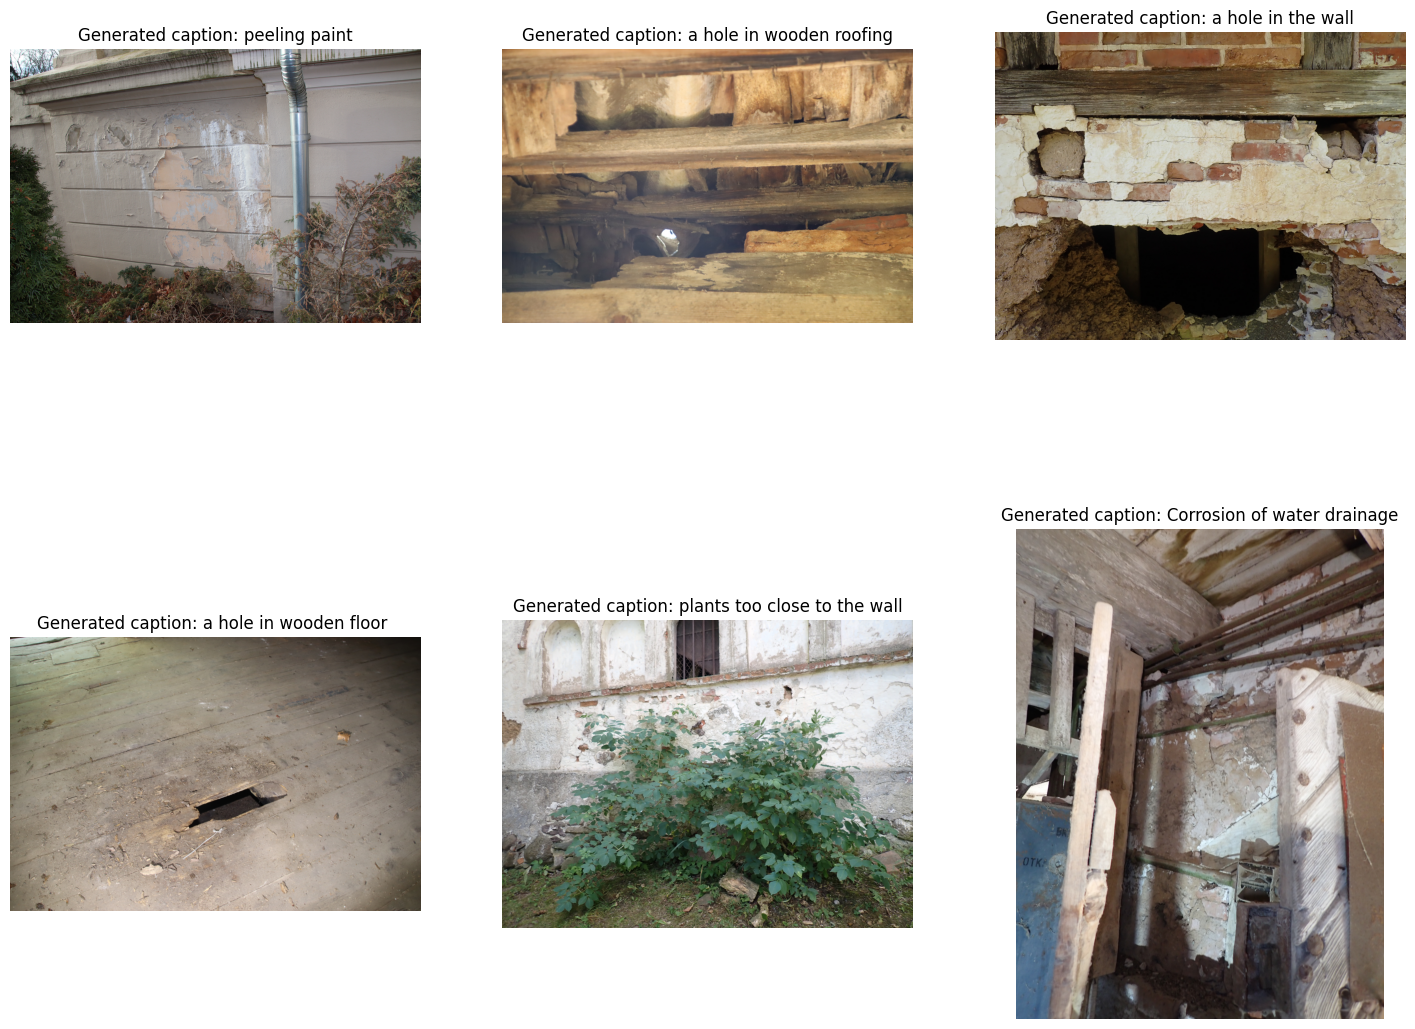

In [ ]:

import torch
from matplotlib import pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

fig = plt.figure(figsize=(18, 14))

# prepare image for the model
for i, example in enumerate(out):
  image = example["image"]
  inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)
  pixel_values = inputs.pixel_values

  generated_ids = model.generate(pixel_values=pixel_values, max_length=25)
  generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
  fig.add_subplot(2, 3, i+1)
  plt.imshow(image)
  plt.axis("off")
  plt.title(f"Generated caption: {generated_caption}")

In [ ]:
## save the model

import os

# Get the current working directory
current_directory = os.getcwd()
save_directory = os.path.join(current_directory, "model/")

model.save_pretrained(save_directory)
processor.save_pretrained(save_directory)

[]

In [ ]:
%cp -r model drive/MyDrive/ColabNotebooks/models/

In [ ]:
## copy the model to the workspace

%cp -r drive/MyDrive/ColabNotebooks/models/ model

### Testing and Evaluation

In [ ]:
text_dict = [
    ('peeling paint', 'peeling paint'),
    ('a hole in the roof', 'a hole in wooden roofing'),
    ('a hole in the wall', 'a hole in the wall'),
    ('a hole in the floor', 'a hole in wooden floor '),
    ('the plant is dying', 'plants too close to the wall'),
    ('water damage', 'Corrosion of water drainage'),
    ('a crack in the stone', 'bio-damage on facade'),
    ('the type of damage is a wood rot', 'biodeterioration of wooden elements'),
    ('the brick wall is cracked and the plaster is peeling', 'water damage on wooden roof and Bio-damage on the wall'),
    ('a wasp nest', 'a wasp nest'),
    ('a bird\'s nest', 'biodeterioration of wooden elements'),
    ('the roof is leaking', 'hole in wooden roofing'),
    ('the damage is from the water', 'algae caused by moisture'),
    ('water damage', 'a hornet nest'),
    ('snow', 'snowy roof, no damage'),
    ('mold', 'bio-damage on facade in basement wall'),
    ('the type of damage is unknown', 'biodeterioration of wooden elements'),
    ('moss', 'moss'),
    ('mold', 'moisture and/or water-soluble salt damage'),
    ('graffiti', 'worn or damaged paint'),
    ('the type of damage is unknown', 'algae on wood'),
    ('the type of damage is unknown', 'water damage on wooden roof'),
    ('the type of damage that is visible in the photo is the type of damage that is visible in the photo', 'bio-damage on facade in basement wall'),
    ('the floor is in bad shape', 'a hole in wooden floor'),
    ('the door is open', 'bio-damage on facade'),
    ('the type of damage that is visible in the photo is the type of damage that is visible in the photo', 'water damage on wooden roof and Bio-damage on the wall'),
    ('the type of damage that is caused by a person who is not wearing a helmet', 'algae caused by moisture'),
    ('the type of damage that is visible in the photo', 'damp problem on cement render'),
    ('a bird', 'biodeterioration of wooden elements')
]

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import nltk

# Download NLTK tokenizer if necessary
nltk.download('punkt')

def calculate_ngram_scores(reference, candidate):
    # Tokenize reference and candidate strings
    reference_tokens = nltk.word_tokenize(reference.lower())
    candidate_tokens = nltk.word_tokenize(candidate.lower())

    # Initialize smoothing function
    smoothing_function = SmoothingFunction().method1

    # Initialize lists to store n-gram scores
    ngram_scores = []

    # Calculate BLEU score for each n-gram order
    for i in range(1, 5):  # Calculate up to 4-gram
        bleu_score = sentence_bleu([reference_tokens], candidate_tokens, weights=(0.25,)*i, smoothing_function=smoothing_function)
        ngram_scores.append(bleu_score)

    return ngram_scores

def calculate_total_bleu(text_dict):
    total_score = 0.0
    num_pairs = len(text_dict)
    cumulative_ngram_scores = [0.0, 0.0, 0.0, 0.0]  # Initialize cumulative n-gram scores

    for reference, candidate in text_dict:
        # Calculate BLEU score for the current pair
        bleu_score = calculate_bleu(reference, candidate)
        total_score += bleu_score

        # Calculate n-gram scores for the current pair
        ngram_scores = calculate_ngram_scores(reference, candidate)

        # Update cumulative n-gram scores
        for i in range(4):
            cumulative_ngram_scores[i] += ngram_scores[i]

    # Calculate average n-gram scores
    average_ngram_scores = [score / num_pairs if num_pairs > 0 else 0 for score in cumulative_ngram_scores]

    return total_score, total_score / num_pairs if num_pairs > 0 else 0, average_ngram_scores


total_bleu_score, average_bleu_score, average_ngram_scores = calculate_total_bleu(text_dict)
print("Total BLEU score:", total_bleu_score)
print("Average BLEU score:", average_bleu_score)
print("Average n-gram scores (1-gram to 4-gram):", average_ngram_scores)


Total BLEU score: 1.0
Average BLEU score: 0.034482758620689655
Average n-gram scores (1-gram to 4-gram): [0.3488464345884193, 0.23362846990799377, 0.16392635581932277, 0.10178457833926899]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##### Testing ground

In [ ]:
# checking if mps runs on mac
import torch
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

print(f"PyTorch version: {torch.__version__}")

# Check PyTorch has access to MPS (Metal Performance Shader, Apple's GPU architecture)
print(f"Is MPS (Metal Performance Shader) built? {torch.backends.mps.is_built()}")
print(f"Is MPS available? {torch.backends.mps.is_available()}")

# Set the device
device = "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using device: {device}")

In [ ]:
## get info about buildings defect dataset images

# Get basic information about the image
print("Image format:", image_info_dict['image'][0].format)
print("Image mode:", image_info_dict['image'][0].mode)
print("Image size:", image_info_dict['image'][0].size)
print("Image palette:", image_info_dict['image'][0].palette)

# Additional information (depends on the image)
print("Image info:", image_info_dict['image'][0].info)
print("Image DPI (dots per inch):", image_info_dict['image'][0].info.get("dpi"))

In [ ]:
# check if cuda runs on google colab
!nvidia-smi